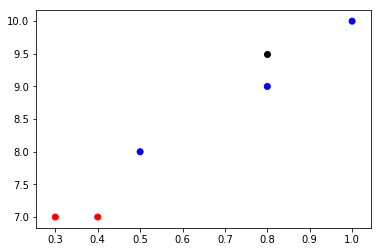

In [1]:
import pandas as pn
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


#Reading Data and converting it to numpy array
data=pn.read_csv("./Data/fish_cost.csv")
data=np.asarray(data)

#Separating label - y(Cost in this case) and features - X
X=data[:,:data.shape[1]-1]
y=data[:,-1:]

#Random test data for testing purpose
test_X=np.array([[0.8,9.5]])

#Plotting the given data and test data in graph for visualization
color=['blue' if c >= 500 else 'red' for c in y]
plt.scatter(X[:,:1],X[:,1:],c=color)
plt.scatter(test_X[:,:1],test_X[:,1:], c = 'black')



Helper function for sorting

In [2]:
def cmp_to_key(mycmp):
    'Convert a cmp= function into a key= function'
    class K(object):
        def __init__(self, obj, *args):
            self.obj = obj
        def __lt__(self, other):
            return mycmp(self.obj, other.obj) < 0
        def __gt__(self, other):
            return mycmp(self.obj, other.obj) > 0
        def __eq__(self, other):
            return mycmp(self.obj, other.obj) == 0
        def __le__(self, other):
            return mycmp(self.obj, other.obj) <= 0  
        def __ge__(self, other):
            return mycmp(self.obj, other.obj) >= 0
        def __ne__(self, other):
            return mycmp(self.obj, other.obj) != 0
    return K

def greater(a,b):
        if (a[1] > b[1]):
            return 1
        return -1

### Solving Regression problem with KNN

In [3]:
def R_KNN(X,y,test,k):
    Dis = []
    X.shape
    for i in range (0, X.shape[0]):
        distance = ((X[i,0] - test[0,0]) ** 2) + ((X[i,1] - test[0,1]) ** 2)
        distance = math.sqrt(distance)

        Dis.insert(i, [y[i,0], distance])



    Dis.sort(key = cmp_to_key(greater))
    
    avg = 0;
    for i in range (0, k):
        avg = avg + Dis[i][0]

    avg = avg / k
    
    return avg


R_KNN(X,y,test_X,3)

733.3333333333334